### Theis (1941) interpretation.  
This is a demonstration of the interpretation of a pumping test in a 
confined aquifer with a boundary effect using the Theis (1941) solution.

Copyright 1998-2007 - Philippe Renard & Co. - GNU GENERAL PUBLIC LICENSE

## Load the data :
The data set for this example has been provided by: 
G. de Marsily, cours DEA Paris 6, "Aquifère côtier de Nefza, Tunisie".
Piezometer A3Bis

In [4]:
import hypy as hp
import matplotlib.pyplot as plt

The data is stored in the ascii file 'ths_ds1.txt' that contains two columns as we can see if we edit the data file with the command edit. The first column is the time in seconds. The second column contains the drawdown in meters.

 Let us now load the data in the python workspace with the ldf function from hytool. This allows to create two vectors: t and s containing the data. We will use them in the next steps, but we can first plot them to check graphicaly that they have been correctly loaded.

In [2]:
t,s = hp.ldftxt('thc_ds1.txt')

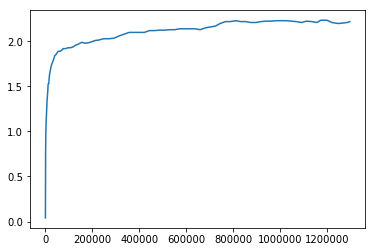

In [5]:
plt.plot(t,s)
plt.show()

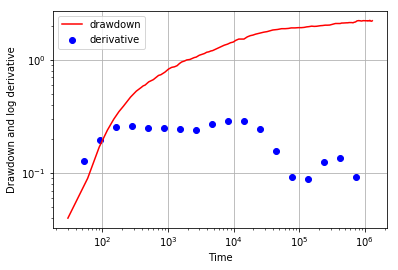

In [6]:
hp.diagnostic(t,s)

The diagnostic plot shows a behavior that indicates a possible constant
head boundary effect. We will therefore interpret the data with thc
model

Model parameter guess :
The parameters allowing to control the Theis (1941) model are the slope
and intercept of the Jacob straight line that one can observe at
intermediate time, and the time at which this straight line interesects
the plateau corresponding to the stabilization of the drawdown.

The function thc_gss allows to estimate these numbers, we then check
with trial if the first guess is acceptable.

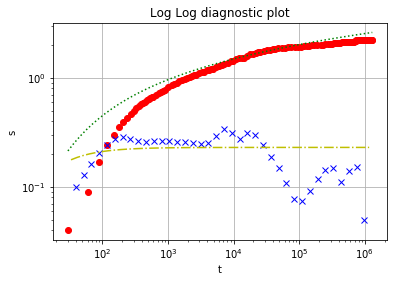

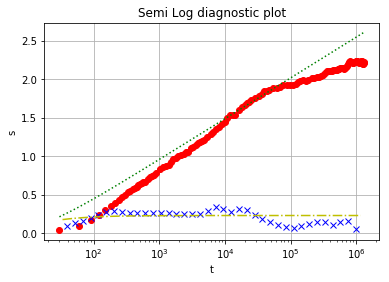

In [9]:
p0 = hp.thc.gss(t,s)
hp.trial(p0,t,s,'thc')

If the way of using a functions is not clear, you can always type "help(hp.nameofthefunction)

In [6]:
help(hp.trial)

Help on function trial in module hypy.hypy:

trial(p, t, s, name)
    TRIAL Display data and calculated solution together
    Syntax:
        hp.trial(x, t, s, 'name')          
    
       name = name of the solution
       x    = vector of parameters
       t,s  = data set
    Description:
        The function trial allows to produce a graph that superposes data
        and a model. This can be used to test graphically the quality of a
        fit, or to adjust manually the parameters of a model until a
        satisfactory fit is obtained.
    Example:
        trial(p,t,s,'ths')
        trial([0.1,1e-3],t,s, 'cls')
    See also: ldf, diagnostic, fit, ths_dmo



The figure shows that the slope of the straight line is too small, the
initial time t0 is to small as well, and the plateau is not really
reached. 


To improve the first guess, we modify manually the values and
check them graphically.

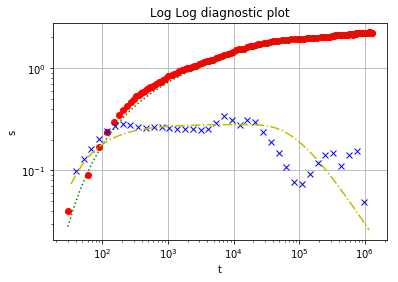

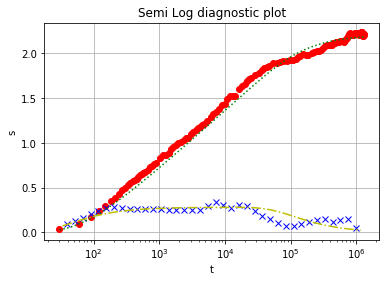

In [13]:
p0 = [0.65,80,2e5]
hp.trial(p0,t,s,'thc')

Automatic fit

Once, we have an acceptable first guess, we run the non linear
optimization fit and again check if the results are correct or not.

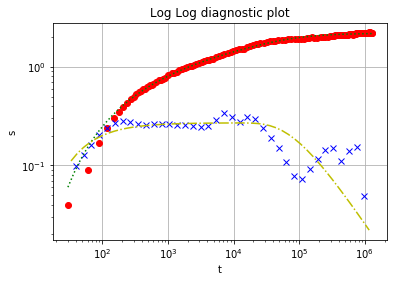

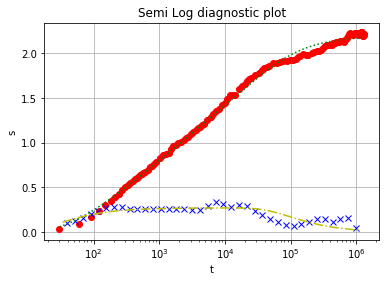

In [14]:
p = hp.fit(p0,t,s,'thc')
hp.trial(p,t,s,'thc')

Reporting the results :
As the fit observed in the previous graph was good, we consider that the
paramaters are well identified and that we can now report the
interpretation.

You can add your name and the title of your rapport in the call of the function. It's also possible to save it as an image with the filetype 'img' or as a pdf with the filetype 'pdf'. You can also change the title of your graph with 
ttle ='title of your graph'. it will automatically save the image or the pdf in the repertory you're currently working on under the name 'ths_rapport.filetype'

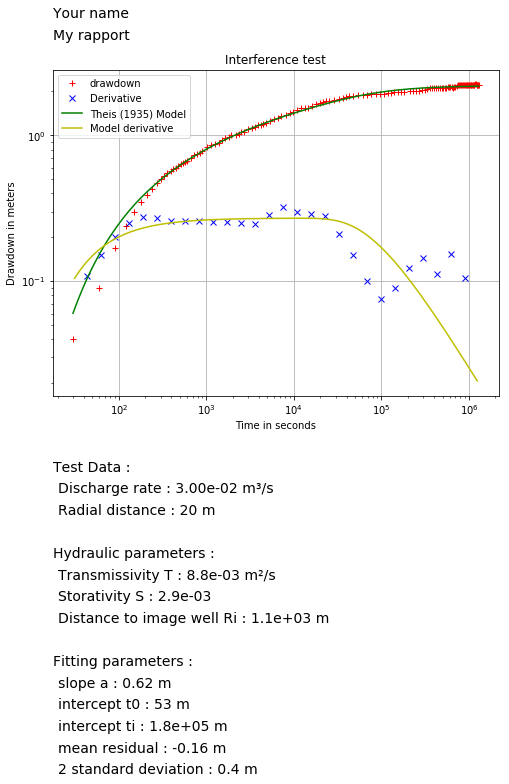

In [15]:
q = 0.030 #Pumping rate in m3/s
r = 20 #radial distance in m
d = [q,r]
hp.thc.rpt(p,t,s,d,'thc',Author='Your name',ttle = 'Interference test', Rapport = 'My rapport', filetype = 'pdf')

The estimated transmissivity is 8.7e-3 m2/s and the storativity is
2.7e-3, the distance to the image well is 1100 m. These numbers are very 
close to the values estimated by de Marsilly: 

T  = 8.4 e-3 m2/s
S  = 2.8 e-3
Ri = 1050 m